In [21]:
#Import Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  


In [22]:
#Load the Dataset
df = pd.read_csv(r"C:\Users\MADHU\Desktop\Global_Superstore.csv", encoding="ISO-8859-1")

In [23]:
#Initial Data Exploration
print(df.head())  # Display first 5 rows
print(df.shape)  # Print number of rows & columns
print(df.info())  # Summary of dataset
print(df.describe())  # Summary statistics for numerical columns


   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID  Prosuct Categories Sub-Category  \
0   TEC-AC-10003033     

In [24]:
#Handle Missing Values
print(df.isnull().sum())  # Count missing values in each column


Row ID                    0
Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Customer ID               0
Customer Name             0
Segment                   0
City                      0
State                     0
Country                   0
Postal Code           41296
Market                    0
Region                    0
Product ID                0
Prosuct Categories        0
Sub-Category              0
Product Name              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Shipping Cost             0
Order Priority            0
dtype: int64


In [25]:
#Numerical Columns → Fill with mean or median
df['Sales'].fillna(df['Sales'].median(), inplace=True)


In [26]:
#Categorical Columns → Fill with mode or 'Unknown'
df['Region'].fillna(df['Region'].mode()[0], inplace=True)


In [27]:
#Drop rows with many missing values
df.dropna(inplace=True)


In [28]:
#Remove Duplicates
print(df.duplicated().sum())  # Count duplicates
df.drop_duplicates(inplace=True)  # Remove duplicates

0


In [29]:
#Handle Outliers
#Use Interquartile Range (IQR) Method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]


In [30]:
#Use Z-score Method
from scipy import stats
df = df[(np.abs(stats.zscore(df['Sales'])) < 3)]


In [31]:
#Compute Statistical Measures
print("Mean Sales:", df["Sales"].mean())
print("Median Sales:", df["Sales"].median())
print("Standard Deviation:", df["Sales"].std())
print("Variance:", df["Sales"].var())


Mean Sales: 84.1313796405797
Median Sales: 39.68
Standard Deviation: 99.84911479718176
Variance: 9969.84572578078


C:\Users\MADHU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


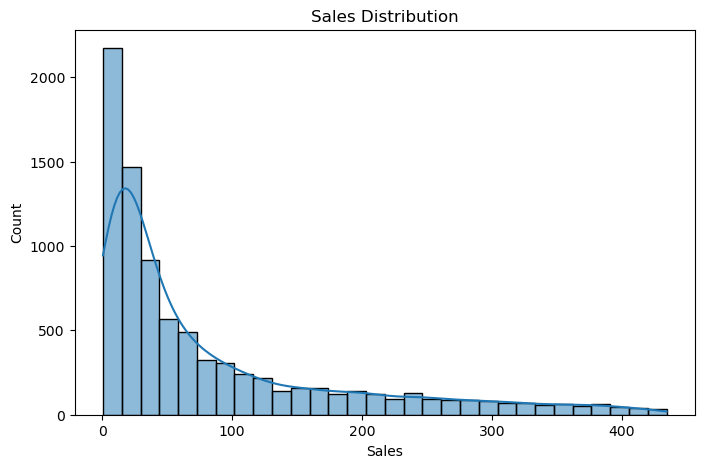

In [32]:
#Data Visualization
#Histogram - Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()


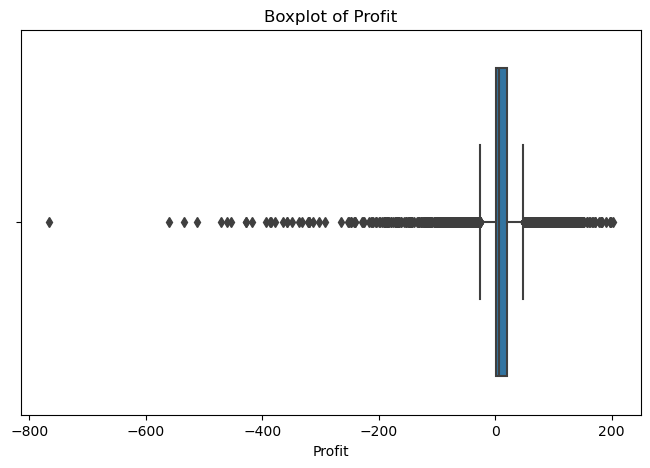

In [33]:
#Boxplot - Identifying Outliers in Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Profit"])
plt.title("Boxplot of Profit")
plt.show()


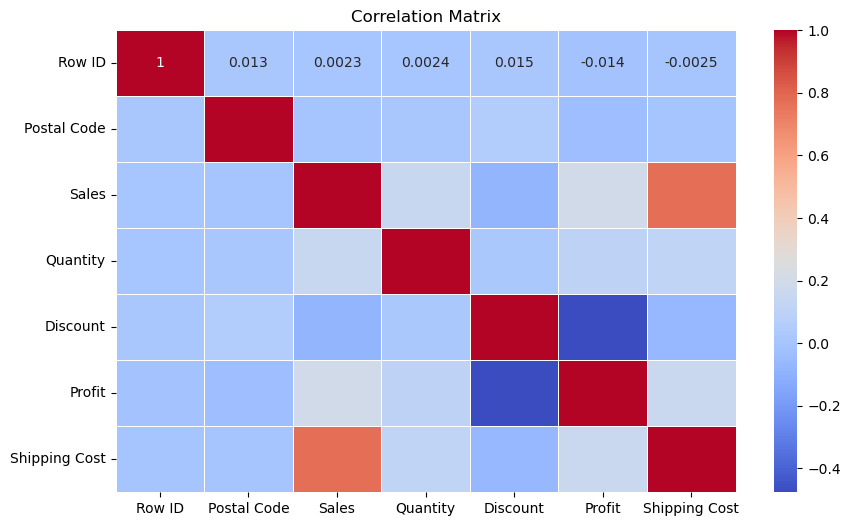

In [34]:
#Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\MADHU\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


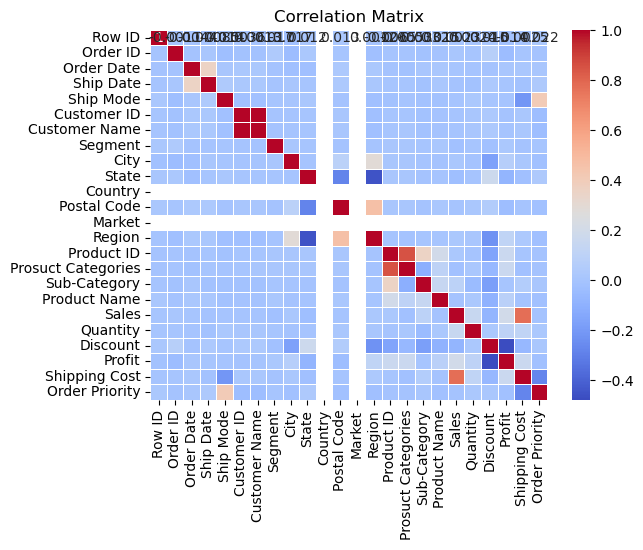

In [36]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
categorical_cols = df.select_dtypes(include=["object"]).columns

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Now plot the heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


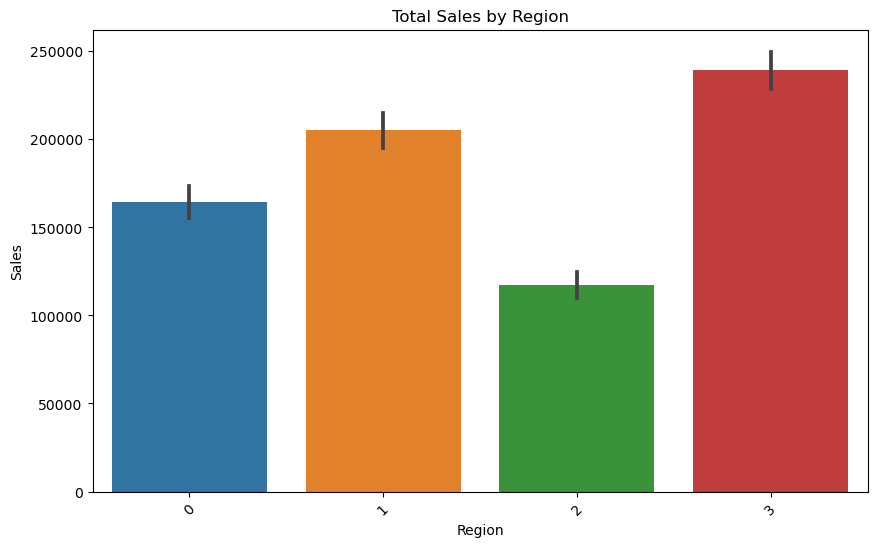

In [37]:
#Bar Chart - Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Sales", data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()


In [38]:
#Save Cleaned Dataset
df.to_csv("Cleaned_Global_Superstore.csv", index=False)
